# **Task 1-Data Preparation and Customer Analytic** 

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  



We have chosen to complete this task in R, however you will also find Python to be a useful tool in this piece of analytics. If you aren’t familiar with R or Python we would recommend searching a few online courses to help get you started. We have also provided an R solution template if you want some assistance in getting through this Task. Whilst its possible to complete the task in Excel you may find the size of the data and the nature of the tasks is such that it is more difficult to complete in Excel.  



To get started, download the resource csv data files below and begin performing high level data checks such as:



Creating and interpreting high level summaries of the data
Finding outliers and removing these (if applicable)
Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.



As we are in the early stages of this analysis Zilinka has asked us to submit our initial findings, so please save your code as a .pdf file and upload it to unlock the model answer.



In [1]:
#Connecting to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Navigate to the folder
# %cd /content/drive/MyDrive/TheForage/Quantium_Data_Analytics

In [3]:
# !ls

In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
#purchase_behaviour
purchase_behaviour_df = pd.read_csv('/content/drive/MyDrive/TheForage/Quantium_Data_Analytics/QVI_purchase_behaviour.csv')
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
#transaction_data
transaction_data_df = pd.read_excel('/content/drive/MyDrive/TheForage/Quantium_Data_Analytics/QVI_transaction_data.xlsx')
transaction_data_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
#dataframes list to validate
list_df = [purchase_behaviour_df,transaction_data_df ]
pd.set_option('display.max_columns', None)
for i in list_df:
  print(i.head())
  print('')
  print(i.shape)
  print('')
  print(i.info())
  print('\n\n\n')


   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

(72637, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None




    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329

purchase_behaviour_df --> has 3 columns with correct datatypes
transaction_data_df --> needs changes to the datatype

In [8]:
# Convert integer column to datetime column with format
#curenlty number of days are stored in the column as excel converts the date
date_format = '%Y-%m-%d'  # Replace with your desired date format
transaction_data_df['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transaction_data_df['DATE'], unit='D')
transaction_data_df['DATE'] = transaction_data_df['DATE'].dt.strftime(date_format)
transaction_data_df['DATE'] = pd.to_datetime(transaction_data_df['DATE'])
transaction_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [9]:
transaction_data_df.head(25)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [10]:
transaction_data_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [11]:
#counting the columns with null values

for i in list_df:
  print('\n\n',i.isna().sum())



 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [12]:
transaction_data_df.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [13]:
#customer data


purchase_behaviour_df



,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


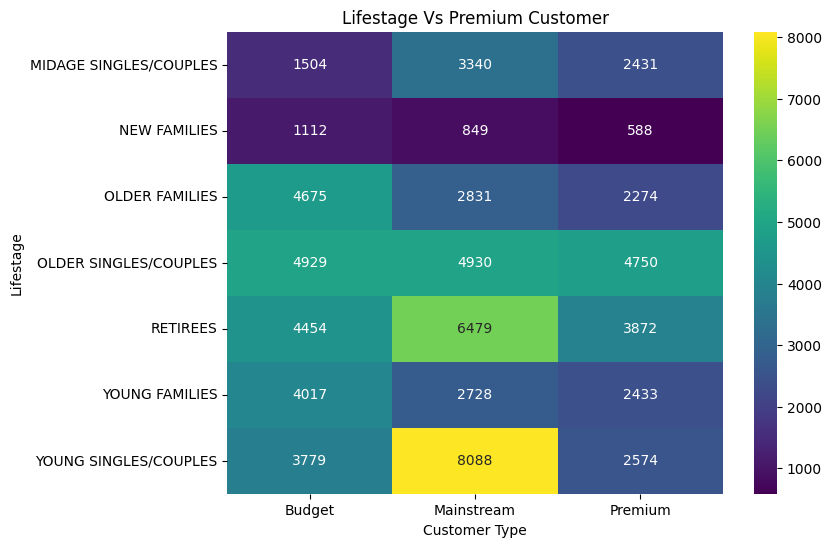

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table of counts for LIFESTAGE and PREMIUM_CUSTOMER
pivot_table = purchase_behaviour_df.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', aggfunc='size', fill_value=0)

# Create a heatmap of the pivot table
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d')

# Add title and axis labels
plt.title('Lifestage Vs Premium Customer')
plt.xlabel('Customer Type')
plt.ylabel('Lifestage')

# Display the plot
plt.show()


In [15]:
pivot_table

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1504,3340,2431
NEW FAMILIES,1112,849,588
OLDER FAMILIES,4675,2831,2274
OLDER SINGLES/COUPLES,4929,4930,4750
RETIREES,4454,6479,3872
YOUNG FAMILIES,4017,2728,2433
YOUNG SINGLES/COUPLES,3779,8088,2574


In [16]:
#merging the dataframes

data_merge = transaction_data_df.merge(purchase_behaviour_df, how='inner', on='LYLTY_CARD_NBR')
data_merge['PROD_NAME_'] =  data_merge['PROD_NAME']
data_merge

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese 175g
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips 160g
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original 175g
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken 170g
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle Sweet Chilli And Sour Cream 175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,Tostitos Splash Of Lime 175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,Doritos Mexicana 170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos Corn Chip Mexican Jalapeno 150g


In [17]:


data_merge['PROD_NAME'] = data_merge['PROD_NAME'].replace(r'([0-9]+[gG])', '', regex=True)
data_merge['PROD_NAME'] = data_merge['PROD_NAME'].replace(r'[^\w]',' ', regex=True)

data_merge

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese 175g
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips 160g
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original 175g
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken 170g
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle Sweet Chilli And Sour Cream 175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,YOUNG SINGLES/COUPLES,Premium,Tostitos Splash Of Lime 175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,Doritos Mexicana 170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos Corn Chip Mexican Jalapeno 150g


In [18]:
data_merge.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt', 'CCs Nacho Cheese    ',
       'WW Original Stacked Chips ', 'CCs Original ',
       'Smiths Crinkle Cut  Chips Chicken ',
       'Smiths Chip Thinly  S Cream Onion ',
       'Kettle Tortilla ChpsHny Jlpno Chili ',
       'Old El Paso Salsa   Dip Tomato Mild ',
       'Tyrrells Crisps     Lightly Salted ',
       'Kettle Tortilla ChpsFeta Garlic ', 'Dorito Corn Chp     Supreme ',
       'Doritos Mexicana    ', 'Smiths Crinkle Chips Salt   Vinegar ',
       'Kettle Original ', 'Tyrrells Crisps     Ched   Chives ',
       'Infuzions BBQ Rib   Prawn Crackers ',
       'Grain Waves         Sweet Chilli ',
       'Old El Paso Salsa   Dip Tomato Med ',
       'Doritos Corn Chip Southern Chicken ',
       'Thins Potato Chips  Hot   Spicy ',
       'Doritos Corn Chip Mexican Jalapeno ',
       'Red Rock Deli Thai  Chilli Lime ',
       'GrnWves Plus Btroot   Chilli Jam ',
       'WW D Style Chip     Sea Salt ', 'Thins Chips Light   Tangy ',
       '

In [19]:
len(data_merge)

264836

In [20]:
#counting the words in a column

from collections import Counter

# Concatenate all sentences into a single string
all_sentences = ' '.join(data_merge['PROD_NAME'])

# Convert the string to lowercase and split into a list of words
all_words = all_sentences.lower().split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Sort the word frequency counts in ascending order
sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1])

# Print the frequency of each word
for word, count in sorted_word_counts:
    print(f'{word}: {count}')


fries: 1418
ncc: 1419
garden: 1419
pc: 1431
sunbites: 1432
whlegrn: 1432
frch: 1432
onin: 1432
chikn: 1434
aioli: 1434
oniondip: 1438
cutsalt: 1440
originl: 1441
saltd: 1441
puffs: 1448
bolognese: 1451
box: 1454
steak: 1455
chimuchurri: 1455
mzzrlla: 1458
hony: 1460
chckn: 1460
chli: 1461
compny: 1468
seasalt: 1468
grnwves: 1468
plus: 1468
btroot: 1468
jam: 1468
d: 1469
style: 1469
pepper: 1473
bacon: 1479
balls: 1479
onionstacked: 1483
stacked: 1487
barbecue: 1489
sp: 1498
truffle: 1498
snag: 1503
sauce: 1503
coconut: 1506
mango: 1507
chutny: 1507
papadums: 1507
mac: 1512
n: 1512
roast: 1519
slow: 1526
rst: 1526
pork: 1526
belly: 1526
tasty: 1539
co: 1572
tmato: 1572
hrb: 1572
spce: 1572
snbts: 1576
whlgrn: 1576
cheddr: 1576
mstrd: 1576
french: 2856
medium: 2879
cheetos: 2927
s: 2934
chs: 2960
smith: 2963
vinegr: 2990
chipco: 3010
rings: 3080
sthrn: 3083
friedchicken: 3083
maple: 3083
slt: 3095
vingar: 3095
crips: 3104
med: 3114
mystery: 3114
flavour: 3114
seasonedchicken: 3114
mexica

In [21]:
#number of PROD_QTY counts 
data_merge["PROD_QTY"].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [22]:
a = data_merge
a = a[a['PROD_QTY']==200]
a

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,OLDER FAMILIES,Premium,Dorito Corn Chp Supreme 380g
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,OLDER FAMILIES,Premium,Dorito Corn Chp Supreme 380g


Both the trac has been done by the same person - maybe an error



In [23]:
#To find the range in which most of the product qty falls
data_merge["PROD_QTY"].value_counts(bins=4).sort_index()

(0.8, 50.75]       264834
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: PROD_QTY, dtype: int64

In [24]:
# selecting rows based on condition to remove the outlier where PROD_QTY = 200
data_merge=data_merge[data_merge['PROD_QTY']<=5] 
data_merge['PROD_QTY'].unique()

array([2, 3, 1, 5, 4])

In [25]:
#TO check the range of dates present
data_merge["DATE"].describe()

<ipython-input-25-610b58cd8bed>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_merge["DATE"].describe()


count                  264834
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [26]:
# dates which are not in the sequence
my_range = pd.date_range(
  start="2018-07-01", end="2019-06-30")
 
print(my_range.difference(data_merge["DATE"]))

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


2018-12-25 is the missing date



In [27]:

transaction_bydate = data_merge["DATE"].value_counts()
transaction_bydate

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: DATE, Length: 364, dtype: int64

In [28]:
transaction_bydate = data_merge["DATE"].value_counts().sort_values(ascending = False)
transaction_bydate

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: DATE, Length: 364, dtype: int64

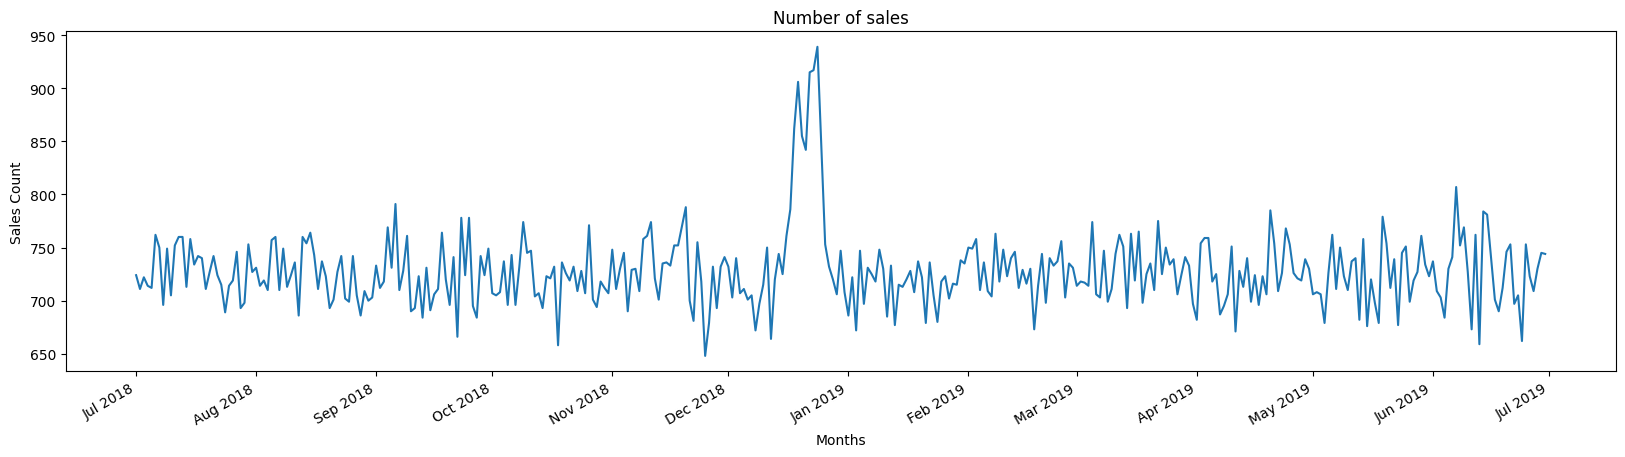

In [29]:
# set the x-axis labels to display every month

# plot the result
ax = transaction_bydate.plot(kind='line', figsize=(20,5))

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

ax.set_xlabel('Months')
ax.set_ylabel('Sales Count')
ax.set_title('Number of sales')
plt.show()

Sales are higher in december

In [30]:
# plt.plot(my_range, data_merge["DATE"].value_counts() )
# plt.show()

#my_range has 365 days vs  data_merge["DATE"].value_counts() has 364 days 

In [31]:
# pd.date_range(start=data_merge["DATE"].min(), end=data_merge["DATE"].max()).difference(data_merge["DATE"])
missing_date = pd.merge(pd.Series(pd.date_range(start=data_merge["DATE"].min(), end = data_merge["DATE"].max()), name="DATE"), data_merge, on = "DATE", how = "left")
missing_date


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_
0,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken,2.0,7.4,MIDAGE SINGLES/COUPLES,Budget,Pringles Sthrn FriedChicken 134g
1,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese,2.0,4.2,MIDAGE SINGLES/COUPLES,Budget,CCs Tasty Cheese 175g
2,2018-07-01,119.0,119051.0,122360.0,113.0,Twisties Chicken,2.0,9.2,MIDAGE SINGLES/COUPLES,Budget,Twisties Chicken270g
3,2018-07-01,269.0,269175.0,266094.0,28.0,Thins Potato Chips Hot Spicy,2.0,6.6,MIDAGE SINGLES/COUPLES,Budget,Thins Potato Chips Hot & Spicy 175g
4,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag,2.0,11.8,MIDAGE SINGLES/COUPLES,Budget,Smiths Crnkle Chip Orgnl Big Bag 380g
...,...,...,...,...,...,...,...,...,...,...,...
264830,2019-06-30,242.0,242159.0,246222.0,36.0,Kettle Chilli,2.0,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle Chilli 175g
264831,2019-06-30,244.0,244213.0,247339.0,93.0,Doritos Corn Chip Southern Chicken,2.0,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos Corn Chip Southern Chicken 150g
264832,2019-06-30,256.0,256018.0,255130.0,105.0,Woolworths Cheese Rings,2.0,3.6,YOUNG SINGLES/COUPLES,Premium,Woolworths Cheese Rings 190g
264833,2019-06-30,257.0,257079.0,256218.0,71.0,Twisties Cheese Burger,2.0,8.6,YOUNG SINGLES/COUPLES,Premium,Twisties Cheese Burger 250g


In [32]:
missing_date["DATE"].value_counts()

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
2018-12-25      1
Name: DATE, Length: 365, dtype: int64

In [33]:
missing_date

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_
0,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken,2.0,7.4,MIDAGE SINGLES/COUPLES,Budget,Pringles Sthrn FriedChicken 134g
1,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese,2.0,4.2,MIDAGE SINGLES/COUPLES,Budget,CCs Tasty Cheese 175g
2,2018-07-01,119.0,119051.0,122360.0,113.0,Twisties Chicken,2.0,9.2,MIDAGE SINGLES/COUPLES,Budget,Twisties Chicken270g
3,2018-07-01,269.0,269175.0,266094.0,28.0,Thins Potato Chips Hot Spicy,2.0,6.6,MIDAGE SINGLES/COUPLES,Budget,Thins Potato Chips Hot & Spicy 175g
4,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag,2.0,11.8,MIDAGE SINGLES/COUPLES,Budget,Smiths Crnkle Chip Orgnl Big Bag 380g
...,...,...,...,...,...,...,...,...,...,...,...
264830,2019-06-30,242.0,242159.0,246222.0,36.0,Kettle Chilli,2.0,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle Chilli 175g
264831,2019-06-30,244.0,244213.0,247339.0,93.0,Doritos Corn Chip Southern Chicken,2.0,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos Corn Chip Southern Chicken 150g
264832,2019-06-30,256.0,256018.0,255130.0,105.0,Woolworths Cheese Rings,2.0,3.6,YOUNG SINGLES/COUPLES,Premium,Woolworths Cheese Rings 190g
264833,2019-06-30,257.0,257079.0,256218.0,71.0,Twisties Cheese Burger,2.0,8.6,YOUNG SINGLES/COUPLES,Premium,Twisties Cheese Burger 250g


In [34]:
#just for Decemeber

transaction_bydate


# '''plt.plot(my_range, missing_date["DATE"].value_counts() )
# plt.show()'''



2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: DATE, Length: 364, dtype: int64

In [35]:

# filter the DataFrame to include only the rows within the desired date range
start_datee = '2018-12-01'
end_datee = '2018-12-31'
filtered_df = missing_date[(missing_date['DATE'] >= start_datee) & (missing_date['DATE'] <= end_datee)]

filtered_df['DATE'].describe()

<ipython-input-35-fd2aabc087b4>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  filtered_df['DATE'].describe()


count                   22836
unique                     31
top       2018-12-24 00:00:00
freq                      939
first     2018-12-01 00:00:00
last      2018-12-31 00:00:00
Name: DATE, dtype: object

In [36]:
counts = filtered_df['DATE'].value_counts()
counts

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
2018-12-20    855
2018-12-21    842
2018-12-17    786
2018-12-16    761
2018-12-26    753
2018-12-11    750
2018-12-30    747
2018-12-14    744
2018-12-03    740
2018-12-27    732
2018-12-01    732
2018-12-15    725
2018-12-13    720
2018-12-28    720
2018-12-10    715
2018-12-05    711
2018-12-31    708
2018-12-04    707
2018-12-29    706
2018-12-07    705
2018-12-02    703
2018-12-06    701
2018-12-09    697
2018-12-08    672
2018-12-12    664
2018-12-25      1
Name: DATE, dtype: int64

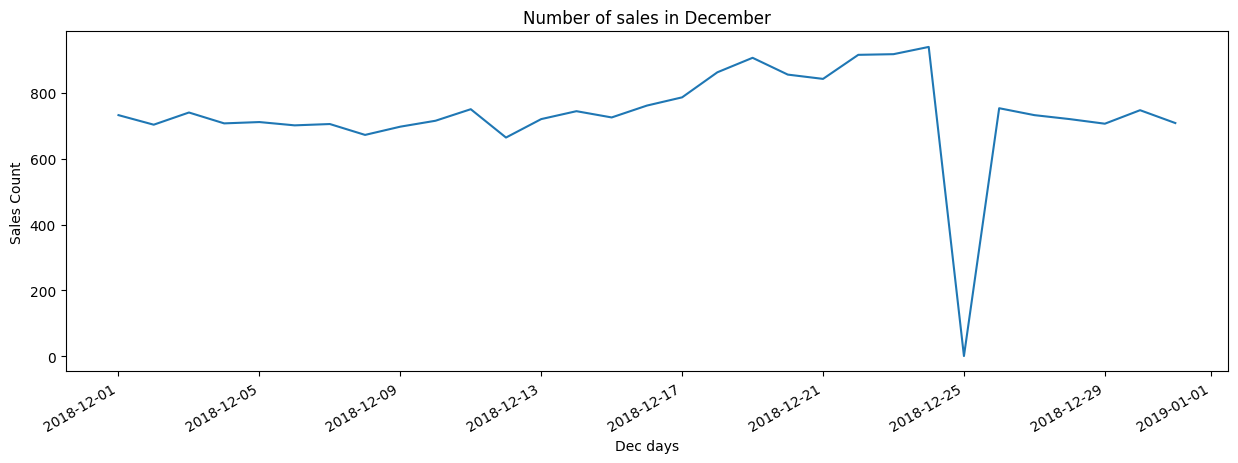

In [37]:
# plot the result
ax = counts.plot(kind='line', figsize=(15,5))
ax.set_xlabel('Dec days')
ax.set_ylabel('Sales Count')
ax.set_title('Number of sales in December')
plt.show()

There is a dip in sale on Christmas as the stores are closed

The highest sales are on the day before the start of the holidays - Dec -24th

Sales have reduced during the holidays at the end of dec

In [38]:
#results with salsa in its name
result_salsa = data_merge[data_merge['PROD_NAME'].str.contains('salsa|Salsa')]
result_salsa

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_
7,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,MIDAGE SINGLES/COUPLES,Budget,Old El Paso Salsa Dip Tomato Mild 300g
17,2018-11-19,4,4196,3536,59,Old El Paso Salsa Dip Tomato Med,2,10.2,MIDAGE SINGLES/COUPLES,Budget,Old El Paso Salsa Dip Tomato Med 300g
50,2018-12-26,19,19272,16684,59,Old El Paso Salsa Dip Tomato Med,1,5.1,MIDAGE SINGLES/COUPLES,Budget,Old El Paso Salsa Dip Tomato Med 300g
72,2019-01-20,33,33081,29953,41,Doritos Salsa Mild,2,5.2,MIDAGE SINGLES/COUPLES,Budget,Doritos Salsa Mild 300g
83,2018-08-13,36,36302,33187,57,Old El Paso Salsa Dip Tomato Mild,2,10.2,MIDAGE SINGLES/COUPLES,Budget,Old El Paso Salsa Dip Tomato Mild 300g
...,...,...,...,...,...,...,...,...,...,...,...
264694,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med,1,5.1,YOUNG SINGLES/COUPLES,Premium,Old El Paso Salsa Dip Tomato Med 300g
264697,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa,1,1.5,YOUNG SINGLES/COUPLES,Premium,Woolworths Mild Salsa 300g
264737,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa,1,2.6,YOUNG SINGLES/COUPLES,Premium,Smiths Crinkle Cut Tomato Salsa 150g
264752,2019-01-11,267,267324,264374,41,Doritos Salsa Mild,1,2.6,YOUNG SINGLES/COUPLES,Premium,Doritos Salsa Mild 300g


In [39]:
result_salsa = data_merge[~data_merge['PROD_NAME'].str.contains('salsa|Salsa')]
data_merge=result_salsa
#dataframe with out salsa items
data_merge

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese 175g
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips 160g
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original 175g
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken 170g
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle Sweet Chilli And Sour Cream 175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,YOUNG SINGLES/COUPLES,Premium,Tostitos Splash Of Lime 175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,Doritos Mexicana 170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos Corn Chip Mexican Jalapeno 150g


In [40]:
data_merge.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
PROD_NAME_          0
dtype: int64

No NULL Values

**Packet size**

In [41]:
data_merge["PROD_NAME_"] = data_merge["PROD_NAME_"].str.replace(r'[0-9]+(G)','g')
packet_sizes = data_merge["PROD_NAME_"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
packet_sizes.value_counts(ascending= False)
print(packet_sizes.describe())

<ipython-input-41-df1686f51c1d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_merge["PROD_NAME_"] = data_merge["PROD_NAME_"].str.replace(r'[0-9]+(G)','g')


count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


Smallest packet is 70g 

Largest packet is 380g

The above sizing seems normal and no outliers

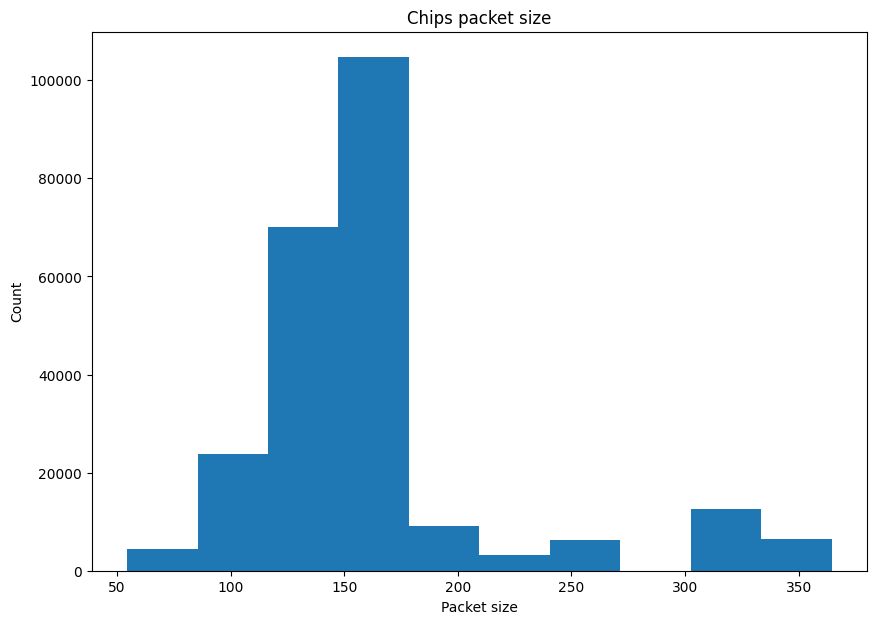

In [42]:
packet_sizes.plot.hist(figsize=(10,7),align="left")

# Set plot title and labels
plt.title('Chips packet size')
plt.xlabel('Packet size')
plt.ylabel('Count')

# Show plot
plt.show()

In [43]:
data_merge['PROD_NAME_'].str.split().str[0].value_counts(ascending = False)

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: PROD_NAME_, dtype: int64

Samebrands are repeated with different names

ex: Dorito Doritos       

In [44]:
data_merge['BRANDS_']=data_merge['PROD_NAME_'].str.split().str[0]
data_merge['BRANDS_'].unique()

array(['Natural', 'CCs', 'WW', 'Smiths', 'Kettle', 'Tyrrells', 'Dorito',
       'Doritos', 'Infuzions', 'Grain', 'Thins', 'Red', 'GrnWves',
       'Tostitos', 'Pringles', 'Cobs', 'Twisties', 'RRD', 'Infzns',
       'Burger', 'NCC', 'Cheezels', 'Smith', 'French', 'Sunbites',
       'Cheetos', 'Woolworths', 'Snbts'], dtype=object)

In [45]:
# Create a dictionary to map alternate names to the unified name
name_mapping = {
    'Natural':'Natural Chip Co',
		'CCs':'CCs',
		'WW':'Woolworths',
		'Smiths':'Smiths',
		'Kettle':'Kettle',
		'Tyrrells':'Tyrrells',
		'Dorito':'Doritos',
		'Doritos':'Doritos',
		'Infuzions':'Infuzions',
		'Grain':'Grain Waves',
		'Thins':'Thins',
		'Red':'RRD',
		'GrnWves':'Grain Waves',
		'Tostitos':'Tostitos',
		'Pringles':'Pringles',
		'Cobs':'Cobs',
		'Twisties':'Twisties',
		'RRD':'RRD',
		'Infzns':'Infuzions',
		'Burger':'Burger',
		'NCC':'Natural Chip Co',
		'Cheezels':'Cheezels',
		'Smith':'Smiths',
		'French':'French',
		'Sunbites':'Sunbites',
		'Cheetos':'Cheetos',
		'Woolworths':'Woolworths',
		'Snbts':'Sunbites'
}

# Replace all alternate names with the unified name using the dictionary
data_merge['BRANDS_'] = data_merge['BRANDS_'].replace(name_mapping)

# Print the resulting DataFrame with unified names
data_merge.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_,BRANDS_
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt175g,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese 175g,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips 160g,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original 175g,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken 170g,Smiths
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths Chip Thinly S/Cream&Onion 175g,Smiths
6,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle
8,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Tyrrells Crisps Lightly Salted 165g,Tyrrells
9,2018-08-09,4,4074,2979,60,Kettle Tortilla ChpsFeta Garlic,2,9.2,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsFeta&Garlic 150g,Kettle
10,2018-12-12,4,4074,2980,4,Dorito Corn Chp Supreme,2,13.0,MIDAGE SINGLES/COUPLES,Budget,Dorito Corn Chp Supreme 380g,Doritos


In [46]:
data_merge['BRANDS_'].value_counts(ascending = False)

Kettle             41288
Smiths             30353
Doritos            25224
Pringles           25102
RRD                16321
Infuzions          14201
Thins              14075
Woolworths         11836
Cobs                9693
Tostitos            9471
Twisties            9454
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger              1564
French              1418
Name: BRANDS_, dtype: int64

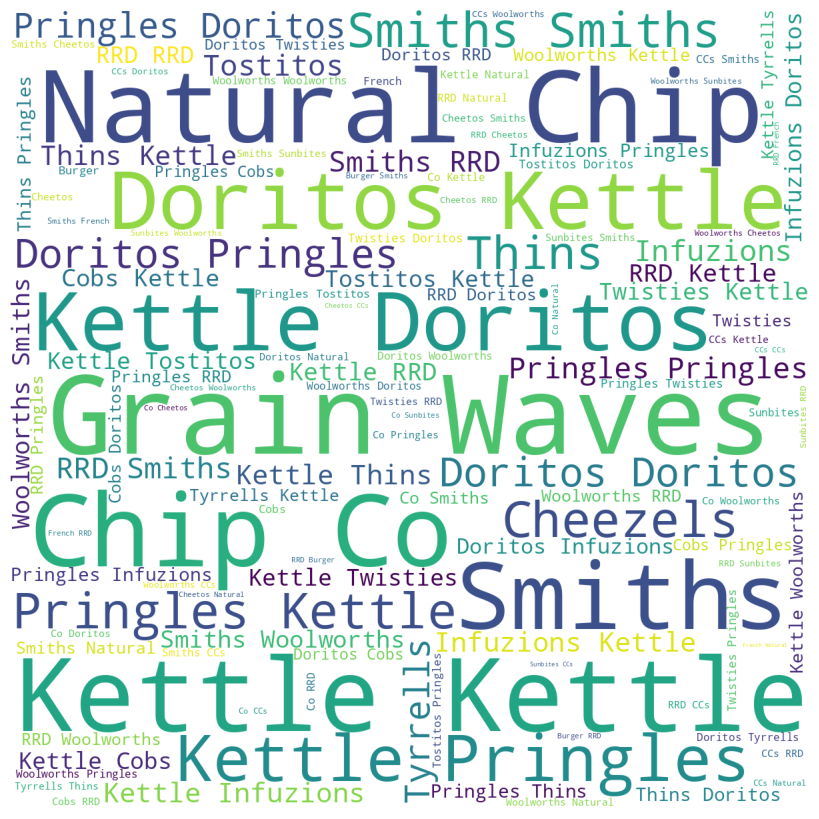

In [47]:
from wordcloud import WordCloud

# Combine all the words into a single string
all_text = ' '.join(data_merge['BRANDS_'])

# Generate the word cloud
wordcloud = WordCloud(width=1200, height=1200, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

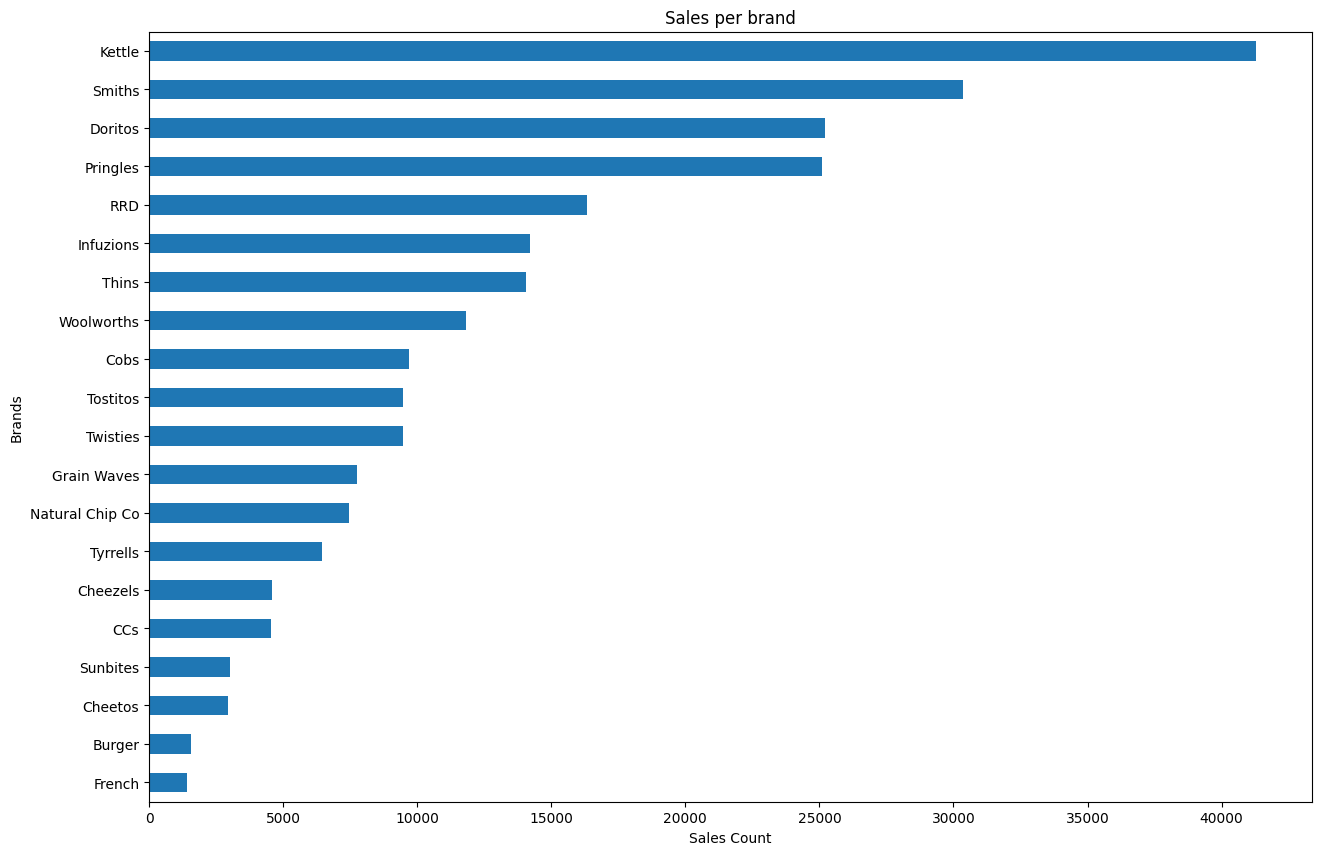

In [48]:
# Plot a horizontal bar chart of Sales per brand
data_merge['BRANDS_'].value_counts(ascending = True).plot.barh(figsize=(15,10))

# Set plot title and labels
plt.title('Sales per brand')
plt.xlabel('Sales Count')
plt.ylabel('Brands')

# Show plot
plt.show()

**Examining customer data**

*   Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
*   How many customers are in each segment 
*   How many chips are bought per customer by segment
*   What's the average chip price by customer segment

In [49]:
data_merge

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_,BRANDS_
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt175g,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese 175g,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips 160g,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original 175g,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken 170g,Smiths
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle Sweet Chilli And Sour Cream 175g,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,YOUNG SINGLES/COUPLES,Premium,Tostitos Splash Of Lime 175g,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,Doritos Mexicana 170g,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos Corn Chip Mexican Jalapeno 150g,Doritos


In [50]:
#Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

grouped_data_bysales = data_merge.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(["sum", "mean"])
grouped_data_bysales



# grouped_sales = pd.DataFrame(merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
# grouped_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
                       Mainstream         84734.25  7.637156
                       Premium            54443.85  7.152371
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720
OLDER FAMILIES         Budget            156863.75  7.291241
                       Mainstream         96413.55  7.281440
                       Premium            75242.60  7.232779
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
                       Mainstream        145168.95  7.269352
                       Premium            91296.65  7.461315
YOUNG FAMILIES         Budget            129717.95  7.302705
                       Mainstream         86338.25  7.226772
                       Premium            78571.70  7.285951
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
                       Mainstream        147582.20  7.551279
                       Premium            39052.30  6.673325

In [51]:
print(data_merge['LIFESTAGE'].unique())

['YOUNG SINGLES/COUPLES' 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES'
 'OLDER FAMILIES' 'OLDER SINGLES/COUPLES' 'RETIREES' 'YOUNG FAMILIES']


In [52]:
grouped_data_bysales = data_merge.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(["sum", "mean"]).sort_values(ascending=False, by="sum")
grouped_data_bysales

# grouped_sales.sort_values(ascending=False, by="sum")
# grouped_sales

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

In [53]:
#total sales

print('Sum of total sales : ',data_merge['TOT_SALES'].sum())

Sum of total sales :  1805177.6999999997


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


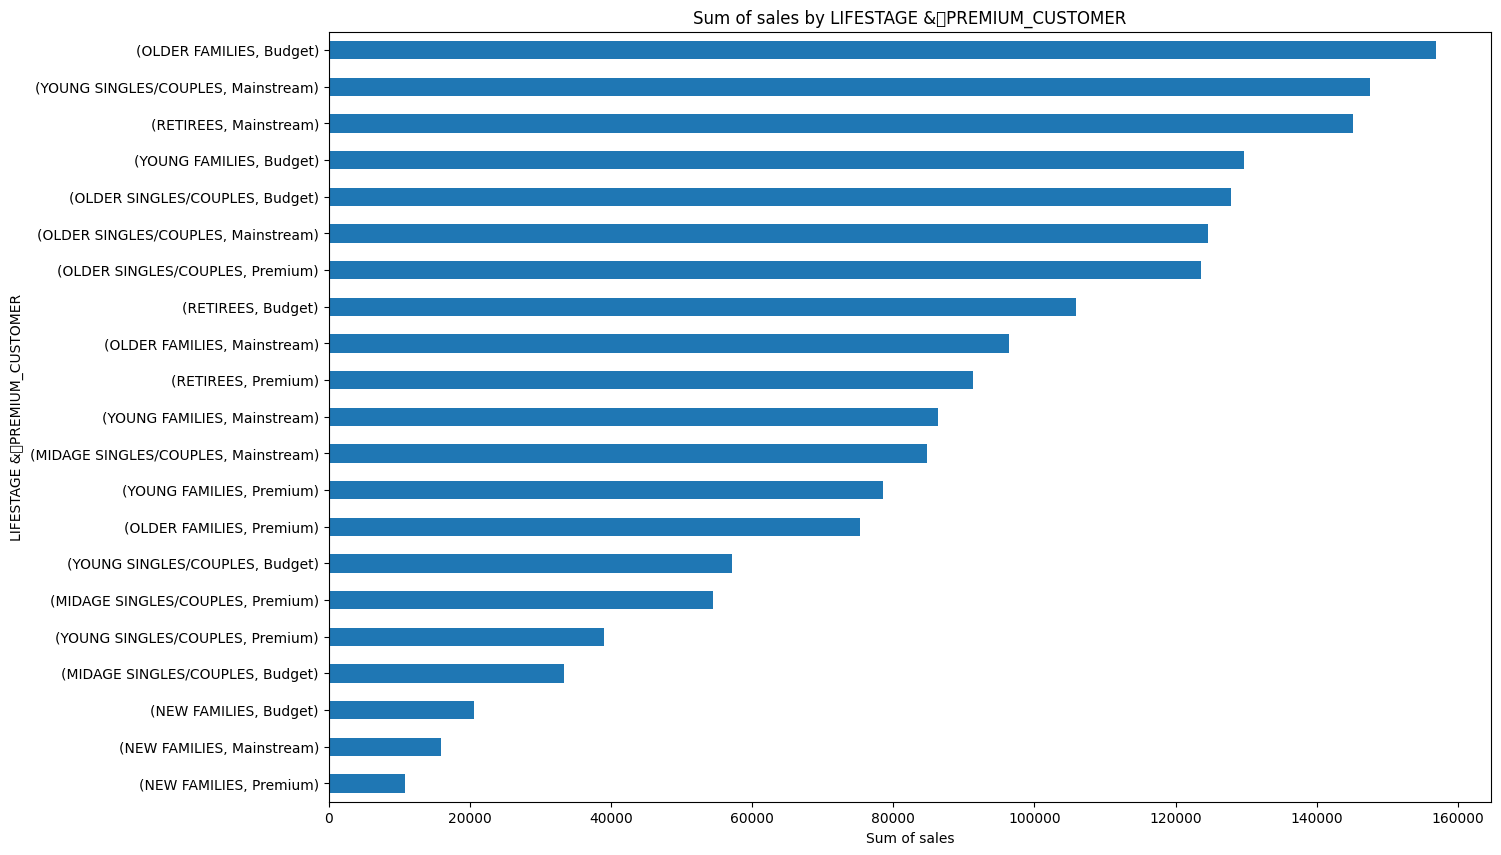

In [54]:
#Plot a horizontal bar chart of Sum of sales by LIFESTAGE &	PREMIUM_CUSTOMER	
grouped_data_bysales['sum'].sort_values().plot.barh(figsize=(15,10))


# Set plot title and labels
plt.title('Sum of sales by LIFESTAGE &	PREMIUM_CUSTOMER')
plt.xlabel('Sum of sales')
plt.ylabel('LIFESTAGE &	PREMIUM_CUSTOMER')

# Show plot
plt.show()

In [55]:
import seaborn as sns

In [56]:
grouped_data_bysales['sum'].sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
NEW FAMILIES            Premium              10760.80
                        Mainstream           15979.70
                        Budget               20607.45
MIDAGE SINGLES/COUPLES  Budget               33345.70
YOUNG SINGLES/COUPLES   Premium              39052.30
MIDAGE SINGLES/COUPLES  Premium              54443.85
YOUNG SINGLES/COUPLES   Budget               57122.10
OLDER FAMILIES          Premium              75242.60
YOUNG FAMILIES          Premium              78571.70
MIDAGE SINGLES/COUPLES  Mainstream           84734.25
YOUNG FAMILIES          Mainstream           86338.25
RETIREES                Premium              91296.65
OLDER FAMILIES          Mainstream           96413.55
RETIREES                Budget              105916.30
OLDER SINGLES/COUPLES   Premium             123537.55
                        Mainstream          124648.50
                        Budget              127833.60
YOUNG FAMILIES          Budget           

<ipython-input-57-0e39bfcc7939>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_data_bysales['Percent'] = grouped_data_bysales.groupby('LIFESTAGE')['TOT_SALES'].apply(lambda x: 100 * x / float(x.sum()))


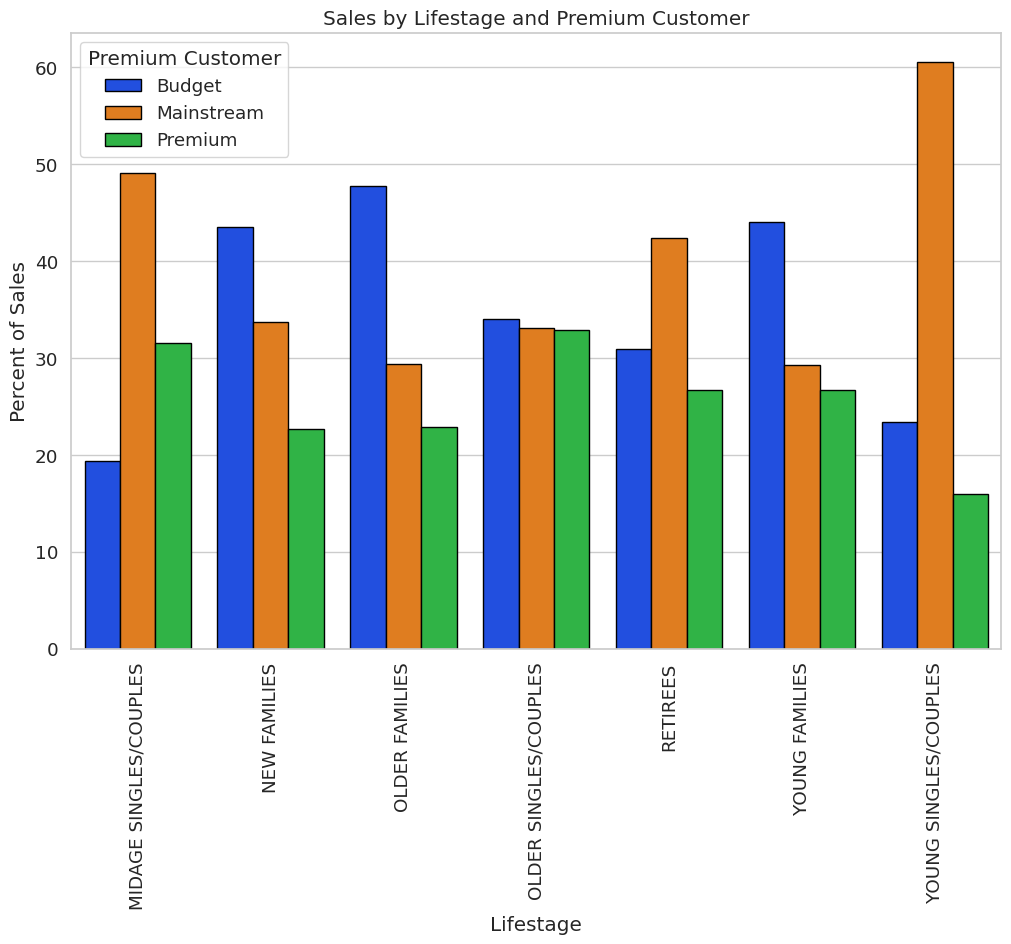

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# calculate sum of sales for each LIFESTAGE and PREMIUM_CUSTOMER combination
grouped_data_bysales = data_merge.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'sum'}).reset_index()

# calculate percentage of sales for each PREMIUM_CUSTOMER within each LIFESTAGE
grouped_data_bysales['Percent'] = grouped_data_bysales.groupby('LIFESTAGE')['TOT_SALES'].apply(lambda x: 100 * x / float(x.sum()))

# plot stacked bar chart
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 8))

sns.barplot(x='LIFESTAGE', y='Percent', hue='PREMIUM_CUSTOMER', data=grouped_data_bysales, palette='bright', edgecolor='black')
plt.xticks(rotation=90) # rotate x-axis labels
# add legend and title
plt.legend(title='Premium Customer', loc='best')
plt.title('Sales by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Percent of Sales')
plt.show()


In [58]:
grouped_data_bysales = data_merge.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'sum'}).reset_index()

# calculate percentage of sales for each PREMIUM_CUSTOMER within each LIFESTAGE
grouped_data_bysales['Percent'] = grouped_data_bysales.groupby('LIFESTAGE')['TOT_SALES'].apply(lambda x: 100 * x / float(x.sum()))
grouped_data_bysales

<ipython-input-58-13ac4667138e>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_data_bysales['Percent'] = grouped_data_bysales.groupby('LIFESTAGE')['TOT_SALES'].apply(lambda x: 100 * x / float(x.sum()))


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,Percent
0,MIDAGE SINGLES/COUPLES,Budget,33345.70,19.328174
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,49.114528
2,MIDAGE SINGLES/COUPLES,Premium,54443.85,31.557298
3,NEW FAMILIES,Budget,20607.45,43.523426
4,NEW FAMILIES,Mainstream,15979.70,33.749508
5,NEW FAMILIES,Premium,10760.80,22.727066
6,OLDER FAMILIES,Budget,156863.75,47.748630
7,OLDER FAMILIES,Mainstream,96413.55,29.347857
8,OLDER FAMILIES,Premium,75242.60,22.903514
9,OLDER SINGLES/COUPLES,Budget,127833.60,33.996521


In [59]:
grouped_data_bysales.sort_values(by = 'Percent', ascending = False)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,Percent
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20,60.544904
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,49.114528
6,OLDER FAMILIES,Budget,156863.75,47.748630
15,YOUNG FAMILIES,Budget,129717.95,44.027721
3,NEW FAMILIES,Budget,20607.45,43.523426
13,RETIREES,Mainstream,145168.95,42.399715
9,OLDER SINGLES/COUPLES,Budget,127833.60,33.996521
4,NEW FAMILIES,Mainstream,15979.70,33.749508
10,OLDER SINGLES/COUPLES,Mainstream,124648.50,33.149464
11,OLDER SINGLES/COUPLES,Premium,123537.55,32.854014


Top 3 categories to purchase chips are 

1.   YOUNG SINGLES/COUPLES - Mainstream
2.   MIDAGE SINGLES/COUPLES - Mainstream	
3.   OLDER FAMILIES - Budget



<ipython-input-60-5557cd0ec8df>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_data_bysales['Percent'] = grouped_data_bysales.groupby('LIFESTAGE')['TOT_SALES'].apply(lambda x: 100 * x / float(x.sum()))


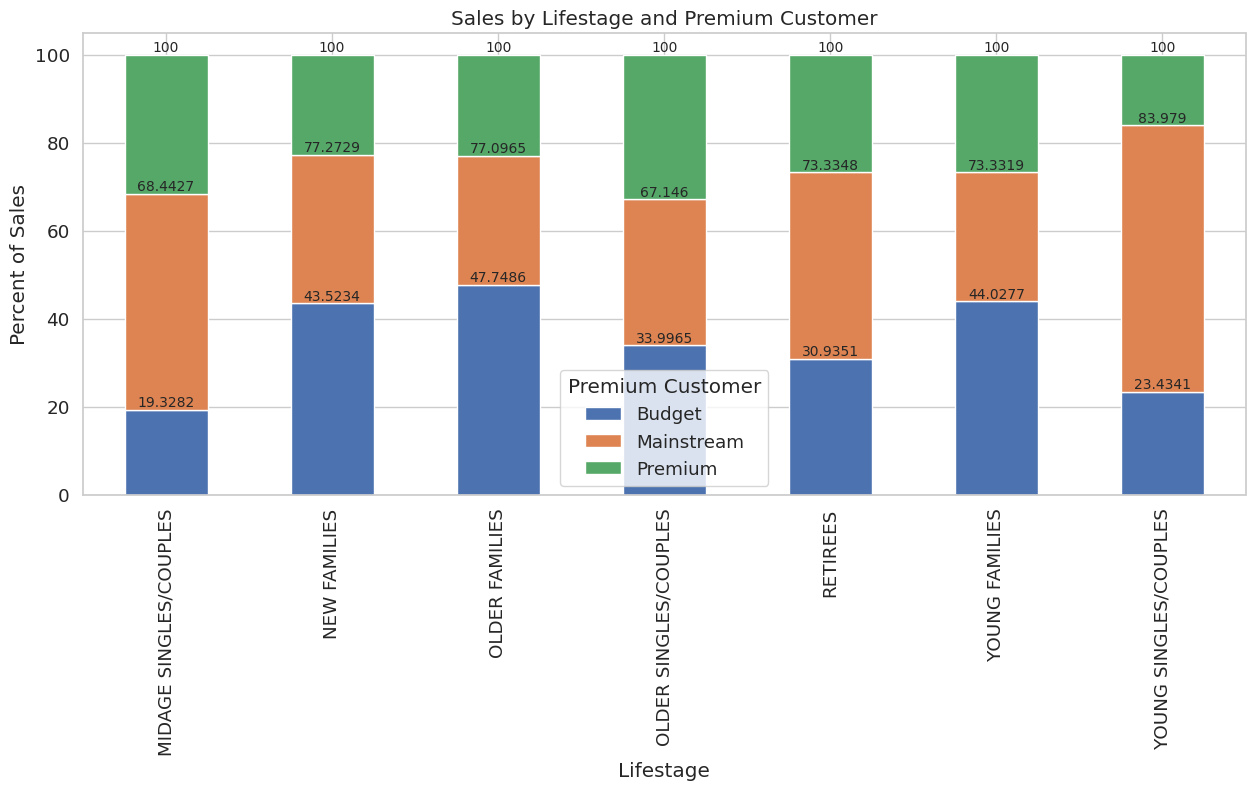

In [60]:
# calculate sum of sales for each LIFESTAGE and PREMIUM_CUSTOMER combination
grouped_data_bysales = data_merge.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'sum'}).reset_index()

# calculate percentage of sales for each PREMIUM_CUSTOMER within each LIFESTAGE
grouped_data_bysales['Percent'] = grouped_data_bysales.groupby('LIFESTAGE')['TOT_SALES'].apply(lambda x: 100 * x / float(x.sum()))

# pivot the data to have PREMIUM_CUSTOMER as columns
pivoted_data = grouped_data_bysales.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='Percent')

# plot stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=True, figsize=(15,6))

# add legend and title
plt.legend(title='Premium Customer', loc='best')
plt.title('Sales by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Percent of Sales')

# display the percentage values for each bar segment
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.show()


In [61]:
data_merge

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_,BRANDS_
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt175g,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese 175g,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips 160g,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original 175g,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken 170g,Smiths
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle Sweet Chilli And Sour Cream 175g,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,YOUNG SINGLES/COUPLES,Premium,Tostitos Splash Of Lime 175g,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,Doritos Mexicana 170g,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos Corn Chip Mexican Jalapeno 150g,Doritos


**How many chips are bought per customer by segment**

In [62]:
grouped_data_byprodqty = data_merge.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].agg(["sum", "mean"]).sort_values(ascending=False, by="sum")
grouped_data_byprodqty


sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Budget            41853  1.945384
RETIREES               Mainstream        37677  1.886680
YOUNG SINGLES/COUPLES  Mainstream        36225  1.853510
YOUNG FAMILIES         Budget            34482  1.941226
OLDER SINGLES/COUPLES  Budget            32883  1.914920
                       Mainstream        32607  1.911201
                       Premium           31695  1.913949
RETIREES               Budget            26932  1.893286
OLDER FAMILIES         Mainstream        25804  1.948795
RETIREES               Premium           23266  1.901438
YOUNG FAMILIES         Mainstream        23194  1.941408
MIDAGE SINGLES/COUPLES Mainstream        21213  1.911942
YOUNG FAMILIES         Premium           20901  1.938149
OLDER FAMILIES         Premium           20239  1.945496
YOUNG SINGLES/COUPLES  Budget            15500  1.808002
MIDAGE SINGLES/COUPLES Premium           14400  1.891750
YOUNG SINGLES/COUPLES  Premium           10575  1.807075
MIDAGE SINGLES/COUPLES Budget             8883  1.893626
NEW FAMILIES           Budget             5241  1.855878
                       Mainstream         4060  1.858124
                       Premium            2769  1.860887

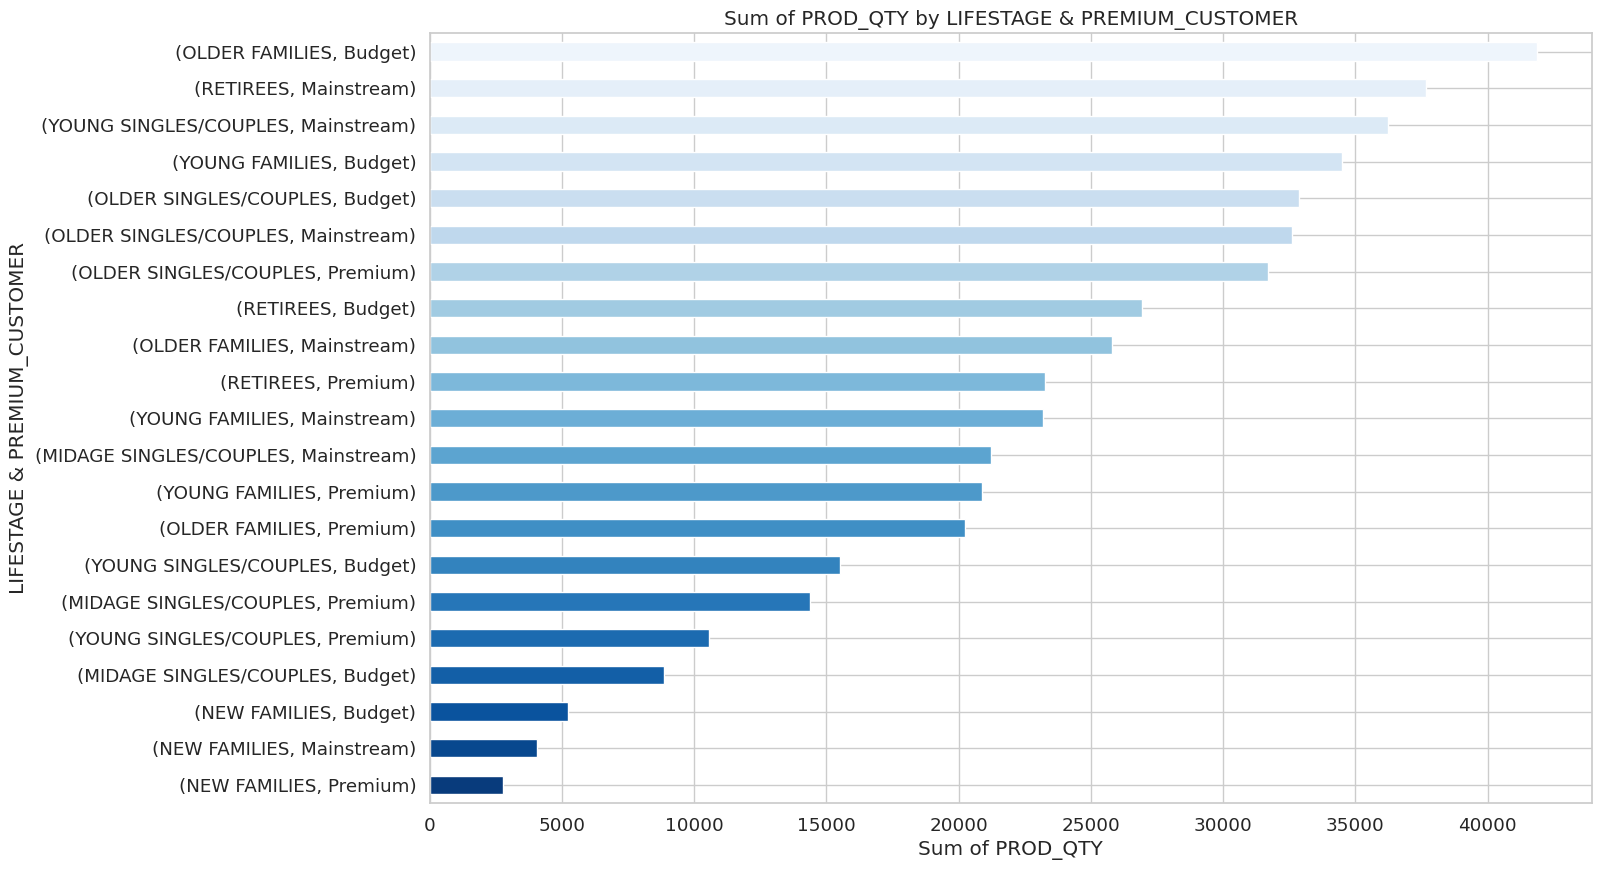

In [63]:
# Define a blue color palette
blue_palette = sns.color_palette("Blues_r", len(grouped_data_byprodqty))

# Plot a horizontal bar chart by LIFESTAGE & PREMIUM_CUSTOMER
grouped_data_byprodqty['sum'].sort_values().plot.barh(figsize=(15,10), color=blue_palette)

# Set plot title and labels
plt.title('Sum of PROD_QTY by LIFESTAGE & PREMIUM_CUSTOMER')
plt.xlabel('Sum of PROD_QTY')
plt.ylabel('LIFESTAGE & PREMIUM_CUSTOMER')

# Show plot
plt.show()


Top 3 LIFESTAGE & PREMIUM_CUSTOMER who brought the most number of chips by quantity

*   OLDER FAMILIES	Budget
*   RETIREES	Mainstream
*   YOUNG SINGLES/COUPLES	Mainstream



**What's the average chip price by customer segment**

In [64]:
grouped_data_avgchipprice = data_merge.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(["sum", "mean"]).sort_values(ascending=True, by="mean")
grouped_data_avgchipprice

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
                       Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
                       Premium            54443.85  7.152371
YOUNG FAMILIES         Mainstream         86338.25  7.226772
NEW FAMILIES           Premium            10760.80  7.231720
OLDER FAMILIES         Premium            75242.60  7.232779
RETIREES               Mainstream        145168.95  7.269352
OLDER FAMILIES         Mainstream         96413.55  7.281440
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Budget            156863.75  7.291241
NEW FAMILIES           Budget             20607.45  7.297256
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Mainstream        124648.50  7.306049
NEW FAMILIES           Mainstream         15979.70  7.313364
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
RETIREES               Budget            105916.30  7.445786
OLDER SINGLES/COUPLES  Premium           123537.55  7.459997
RETIREES               Premium            91296.65  7.461315
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156

The above gives the avg chip price

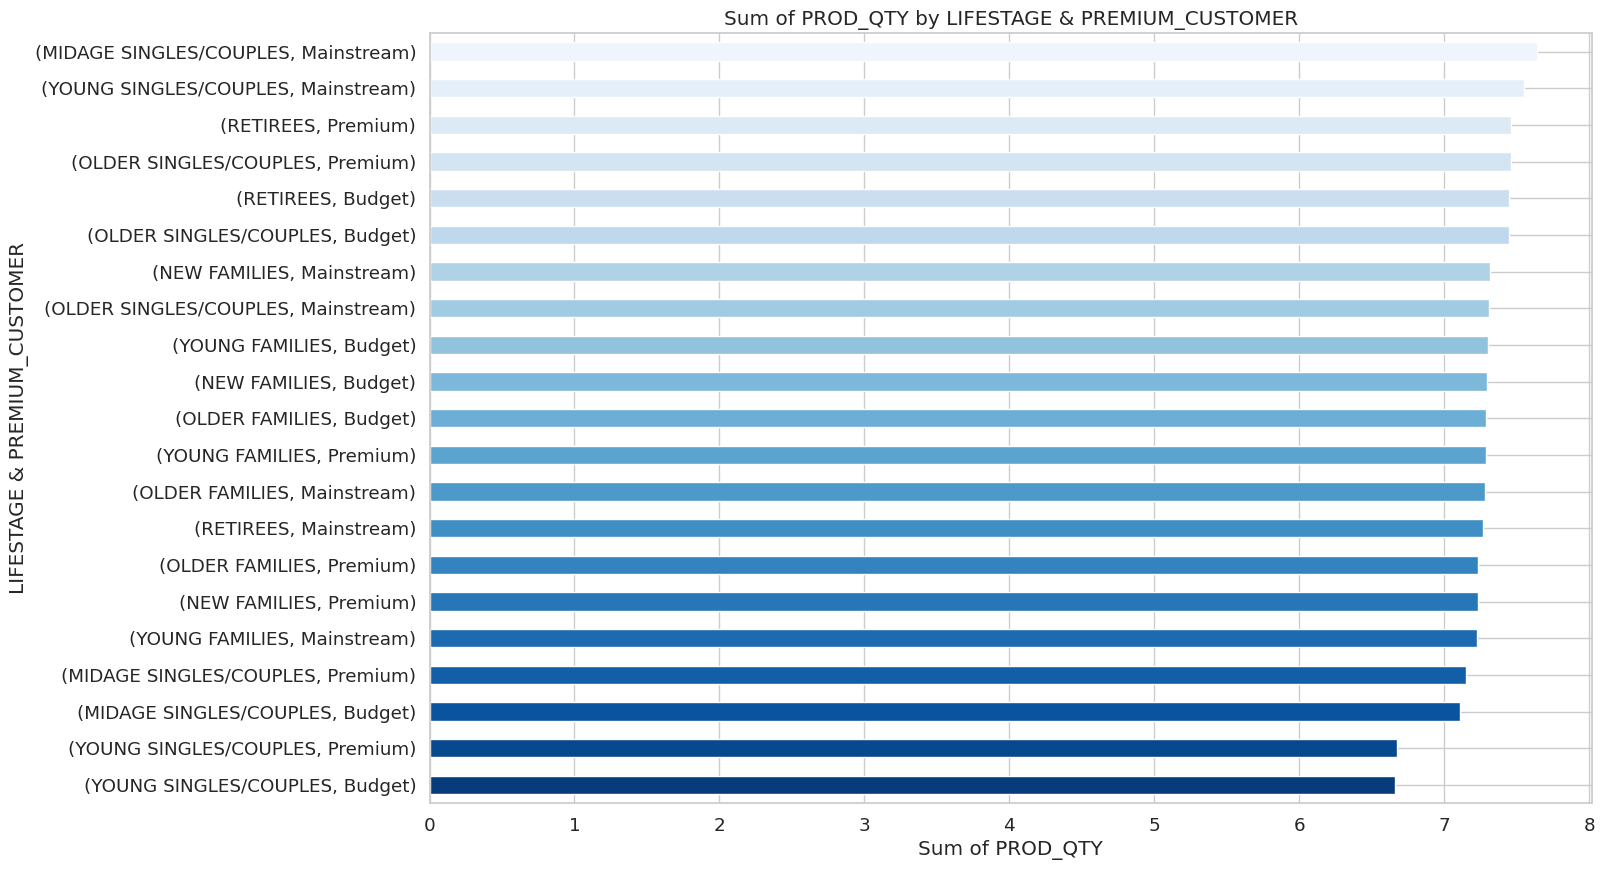

In [65]:
# Define a blue color palette
blue_palette = sns.color_palette("Blues_r", len(grouped_data_avgchipprice))

# Plot a horizontal bar chart by LIFESTAGE & PREMIUM_CUSTOMER
grouped_data_avgchipprice['mean'].sort_values().plot.barh(figsize=(15,10), color=blue_palette)

# Set plot title and labels
plt.title('Sum of PROD_QTY by LIFESTAGE & PREMIUM_CUSTOMER')
plt.xlabel('Sum of PROD_QTY')
plt.ylabel('LIFESTAGE & PREMIUM_CUSTOMER')

# Show plot
plt.show()


Least - YOUNG SINGLES/COUPLES	Budget

Highest - MIDAGE SINGLES/COUPLES	Mainstream

**T-test**

In [66]:

from scipy.stats import ttest_ind
mainstream = data_merge["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (data_merge["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (data_merge["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (data_merge["PREMIUM_CUSTOMER"] == "Budget") | (data_merge["PREMIUM_CUSTOMER"] == "Premium")

a = data_merge[young_midage & mainstream]["TOT_SALES"]
b = data_merge[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001
     

1.834645908175313e-237


True

Pvalue is very less; very close to zero - There is a statistically significant difference 


In [67]:
data_merge.head(25)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_,BRANDS_
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt175g,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese 175g,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips 160g,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original 175g,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken 170g,Smiths
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths Chip Thinly S/Cream&Onion 175g,Smiths
6,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle
8,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Tyrrells Crisps Lightly Salted 165g,Tyrrells
9,2018-08-09,4,4074,2979,60,Kettle Tortilla ChpsFeta Garlic,2,9.2,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsFeta&Garlic 150g,Kettle
10,2018-12-12,4,4074,2980,4,Dorito Corn Chp Supreme,2,13.0,MIDAGE SINGLES/COUPLES,Budget,Dorito Corn Chp Supreme 380g,Doritos


In [68]:
data_merge.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["BRANDS_"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream       

In [69]:
data_merge

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_,BRANDS_
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt175g,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese 175g,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips 160g,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original 175g,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken 170g,Smiths
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle Sweet Chilli And Sour Cream 175g,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,YOUNG SINGLES/COUPLES,Premium,Tostitos Splash Of Lime 175g,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,Doritos Mexicana 170g,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos Corn Chip Mexican Jalapeno 150g,Doritos


========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle      838
Smiths      787
Pringles    537
Name: BRANDS_, dtype: int64


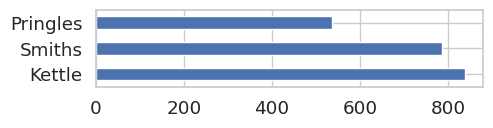

========== YOUNG SINGLES/COUPLES - Budget ==========
Kettle      1211
Smiths      1185
Pringles     832
Name: BRANDS_, dtype: int64


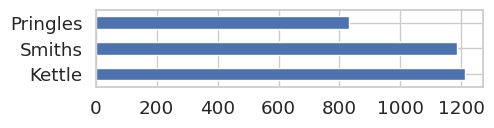

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3844
Doritos     2379
Pringles    2315
Name: BRANDS_, dtype: int64


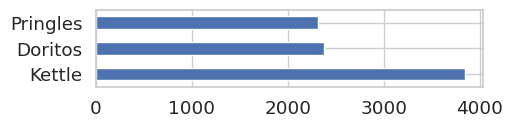

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle      1206
Smiths       923
Pringles     781
Name: BRANDS_, dtype: int64


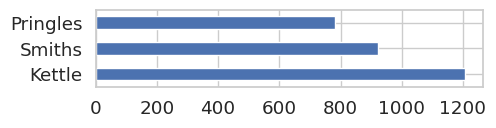

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle     713
Smiths     591
Doritos    479
Name: BRANDS_, dtype: int64


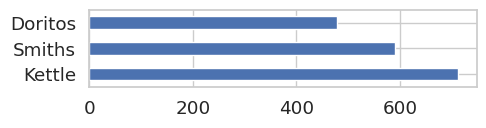

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle     2136
Smiths     1276
Doritos    1210
Name: BRANDS_, dtype: int64


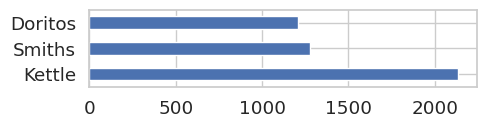

========== NEW FAMILIES - Premium ==========
Kettle      247
Pringles    165
Smiths      155
Name: BRANDS_, dtype: int64


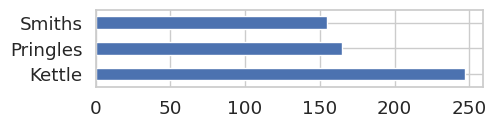

========== NEW FAMILIES - Budget ==========
Kettle     510
Smiths     328
Doritos    315
Name: BRANDS_, dtype: int64


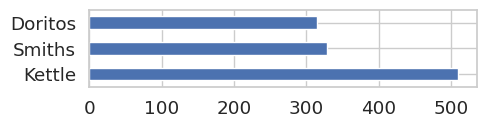

========== NEW FAMILIES - Mainstream ==========
Kettle     414
Doritos    257
Smiths     244
Name: BRANDS_, dtype: int64


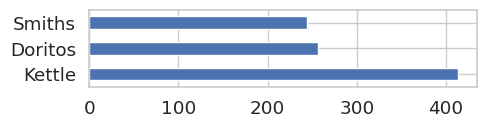

========== OLDER FAMILIES - Premium ==========
Kettle      1512
Smiths      1448
Pringles    1014
Name: BRANDS_, dtype: int64


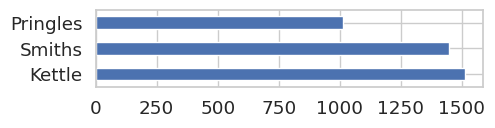

========== OLDER FAMILIES - Budget ==========
Kettle     3320
Smiths     2948
Doritos    2032
Name: BRANDS_, dtype: int64


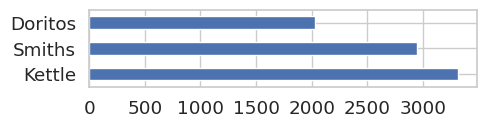

========== OLDER FAMILIES - Mainstream ==========
Kettle     2019
Smiths     1742
Doritos    1263
Name: BRANDS_, dtype: int64


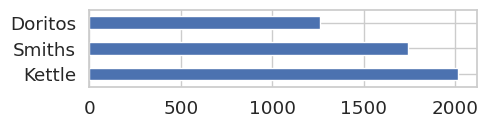

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle     2947
Smiths     1952
Doritos    1784
Name: BRANDS_, dtype: int64


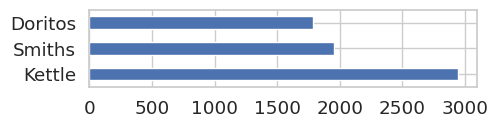

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle      3065
Smiths      2010
Pringles    1843
Name: BRANDS_, dtype: int64


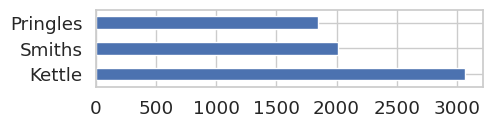

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle     2835
Smiths     2070
Doritos    1791
Name: BRANDS_, dtype: int64


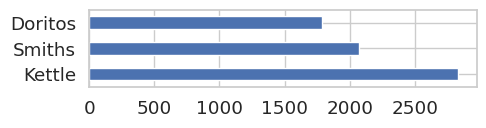

========== RETIREES - Premium ==========
Kettle      2216
Smiths      1395
Pringles    1331
Name: BRANDS_, dtype: int64


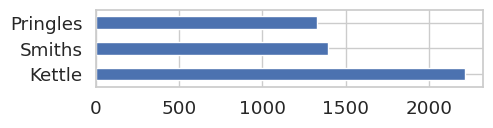

========== RETIREES - Budget ==========
Kettle     2592
Smiths     1612
Doritos    1592
Name: BRANDS_, dtype: int64


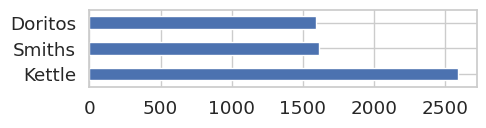

========== RETIREES - Mainstream ==========
Kettle      3386
Smiths      2367
Pringles    2103
Name: BRANDS_, dtype: int64


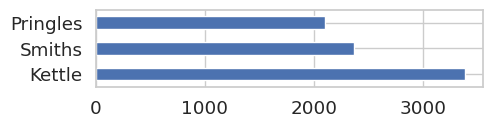

========== YOUNG FAMILIES - Premium ==========
Kettle      1745
Smiths      1384
Pringles    1007
Name: BRANDS_, dtype: int64


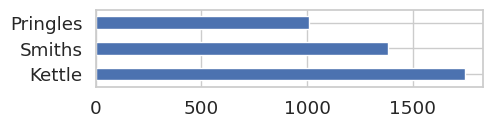

========== YOUNG FAMILIES - Budget ==========
Kettle     2743
Smiths     2334
Doritos    1767
Name: BRANDS_, dtype: int64


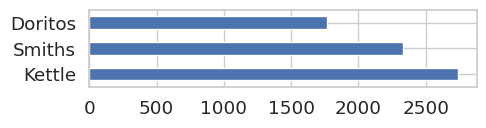

========== YOUNG FAMILIES - Mainstream ==========
Kettle      1789
Smiths      1681
Pringles    1148
Name: BRANDS_, dtype: int64


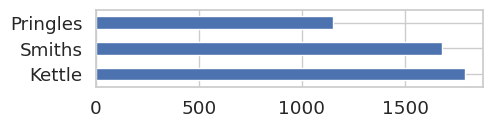

In [70]:

for stage in data_merge["LIFESTAGE"].unique():
    for prem in data_merge["PREMIUM_CUSTOMER"].unique():
      print('==========',stage, '-', prem,'==========')
      summary = data_merge[(data_merge["LIFESTAGE"] == stage) & (data_merge["PREMIUM_CUSTOMER"] == prem)]["BRANDS_"].value_counts().head(3)
      print(summary)
      plt.figure()
      summary.plot.barh(figsize=(5,1))
      plt.show()
     

In [71]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


# Perform one-hot encoding on the transaction data
onehot_df = pd.get_dummies(data_merge['BRANDS_'])

# Apply Apriori algorithm to find frequent itemsets
freq_itemsets = apriori(onehot_df, min_support=0.01, use_colnames=True)
freq_itemsets
# Generate association rules from frequent itemsets
rules = association_rules(freq_itemsets, metric="lift", min_threshold=1)

# Print the top 10 rules with highest lift
print(rules.sort_values('lift', ascending=False).head(10))


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


In [72]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

temp = data_merge.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["BRANDS_"])], axis=1)


# perform Apriori algorithm to get frequent itemsets
frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)

# generate association rules
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)

set_temp = temp["Segment"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(OLDER FAMILIES - Budget),(Smiths),0.087193,0.123016,0.011948,0.137027,1.113895,0.001222,1.016236
2,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069596,0.167334,0.012422,0.178488,1.066658,0.000776,1.013578
5,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067115,0.167334,0.011944,0.177959,1.063495,0.000713,1.012925
7,(RETIREES - Budget),(Kettle),0.057652,0.167334,0.010505,0.182214,1.088926,0.000858,1.018196
8,(RETIREES - Mainstream),(Kettle),0.080935,0.167334,0.013723,0.169554,1.013269,0.000180,1.002674
11,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,0.002325,1.036537


Association rules generated by market basket analysis typically have the following format:

- Antecedent: The item or items that appear in the left-hand side of the rule, indicating the condition or trigger for the rule.
- Consequent: The item or items that appear in the right-hand side of the rule, indicating the outcome or action that is associated with the antecedent.
- Support: The frequency of occurrence of both the antecedent and the consequent in the dataset.
- Confidence: The probability that the consequent occurs given that the antecedent occurs.
- Lift: The ratio of the observed support to the expected support if the antecedent and consequent were independent.
- Leverage: The difference between the observed support and the expected support if the antecedent and consequent were independent.
- Conviction: The ratio of the expected frequency of occurrence of the antecedent and the consequent under the assumption that they are independent, to the observed frequency of occurrence of the consequent given the antecedent.

The interpretation of these metrics can vary depending on the specific context and goals of the analysis, but generally:

- A high support indicates that the antecedent and consequent are frequently observed together in the dataset.
- A high confidence indicates that the occurrence of the consequent is highly dependent on the occurrence of the antecedent.
- A high lift indicates that the occurrence of the antecedent and consequent together is more than what would be expected if they were independent.
- A high leverage indicates that the occurrence of the antecedent and consequent together is greater than what would be expected by chance alone.
- A high conviction indicates that the occurrence of the consequent is highly dependent on the absence of the antecedent.

***Most of the customers prefer Kettle brand***

In [73]:
import re

# Define a function to extract the number from the product name
def extract_weight(product_name):
    # Look for a number followed by "g" or "G" at the end of the string
    match = re.search(r'(\d+)\s*[gG]$', product_name)
    if match:
        # Return the number as an integer
        return int(match.group(1))
    else:
        # If no match found, return None
        return None

# Apply the function to the "Product_Name" column and store the result in a new column called "Product_Weight"
data_merge['Product_Weight'] = data_merge['PROD_NAME_'].apply(extract_weight)

data_merge


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME_,BRANDS_,Product_Weight
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt175g,Natural Chip Co,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese 175g,CCs,175.0
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips 160g,Woolworths,160.0
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original 175g,CCs,175.0
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken 170g,Smiths,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle Sweet Chilli And Sour Cream 175g,Kettle,175.0
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,YOUNG SINGLES/COUPLES,Premium,Tostitos Splash Of Lime 175g,Tostitos,175.0
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,Doritos Mexicana 170g,Doritos,170.0
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos Corn Chip Mexican Jalapeno 150g,Doritos,150.0


In [74]:
data_merge['Product_Weight'].unique()

array([175., 160., 170., 150., 165., 380., 330., 110., 210., 180., 200.,
        nan, 134., 270., 220., 125.,  70., 250.,  90., 190.])

========== YOUNG SINGLES/COUPLES - Premium ==========
grams  Count
175.0    1587
170.0     452
150.0     896
134.0     537
110.0     499
Name: Product_Weight, dtype: int64


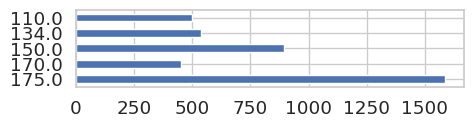

========== YOUNG SINGLES/COUPLES - Budget ==========
grams  Count
175.0    2262
170.0     724
150.0    1325
134.0     832
110.0     677
Name: Product_Weight, dtype: int64


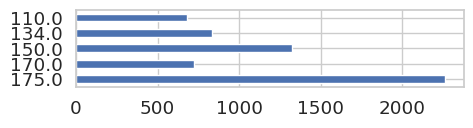

========== YOUNG SINGLES/COUPLES - Mainstream ==========
grams  Count
175.0    4928
170.0    1575
150.0    2998
134.0    2315
110.0    2051
Name: Product_Weight, dtype: int64


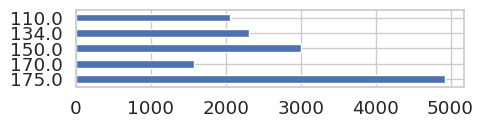

========== MIDAGE SINGLES/COUPLES - Premium ==========
grams  Count
175.0    2034
170.0     583
150.0    1163
134.0     781
110.0     665
Name: Product_Weight, dtype: int64


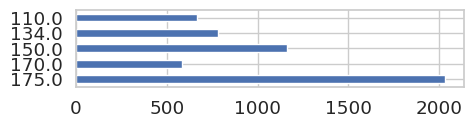

========== MIDAGE SINGLES/COUPLES - Budget ==========
grams  Count
175.0    1256
170.0     370
150.0     746
134.0     449
110.0     434
Name: Product_Weight, dtype: int64


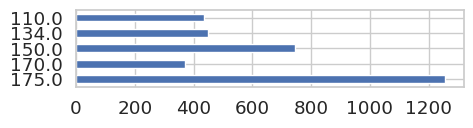

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
grams  Count
175.0    2912
170.0     882
150.0    1714
134.0    1159
110.0    1124
Name: Product_Weight, dtype: int64


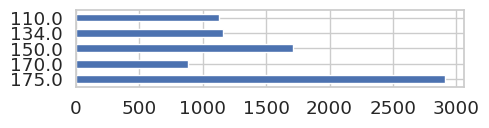

========== NEW FAMILIES - Premium ==========
grams  Count
175.0    371
170.0    113
150.0    225
134.0    165
110.0    148
Name: Product_Weight, dtype: int64


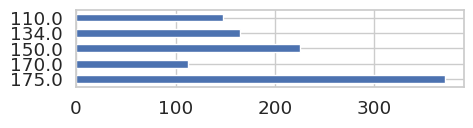

========== NEW FAMILIES - Budget ==========
grams  Count
175.0    763
170.0    239
150.0    425
134.0    309
110.0    291
Name: Product_Weight, dtype: int64


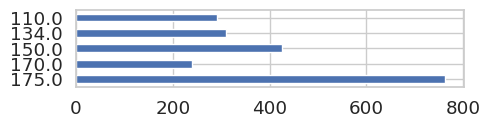

========== NEW FAMILIES - Mainstream ==========
grams  Count
175.0    579
170.0    169
150.0    362
134.0    224
110.0    214
Name: Product_Weight, dtype: int64


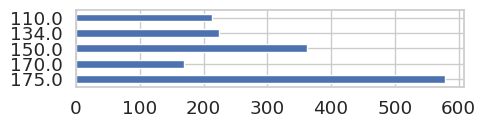

========== OLDER FAMILIES - Premium ==========
grams  Count
175.0    2747
170.0     825
150.0    1607
134.0    1014
110.0     875
Name: Product_Weight, dtype: int64


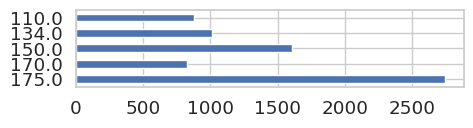

========== OLDER FAMILIES - Budget ==========
grams  Count
175.0    5662
170.0    1786
150.0    3414
134.0    1996
110.0    1803
Name: Product_Weight, dtype: int64


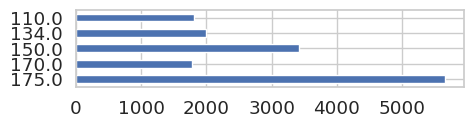

========== OLDER FAMILIES - Mainstream ==========
grams  Count
175.0    3489
170.0    1073
150.0    2091
134.0    1234
110.0    1131
Name: Product_Weight, dtype: int64


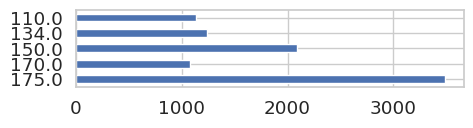

========== OLDER SINGLES/COUPLES - Premium ==========
grams  Count
175.0    4382
170.0    1324
150.0    2672
134.0    1744
110.0    1504
Name: Product_Weight, dtype: int64


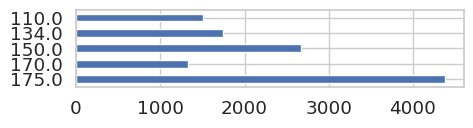

========== OLDER SINGLES/COUPLES - Budget ==========
grams  Count
175.0    4535
170.0    1321
150.0    2726
134.0    1843
110.0    1629
Name: Product_Weight, dtype: int64


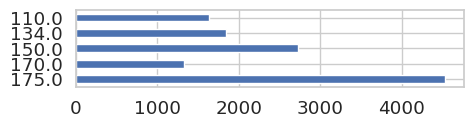

========== OLDER SINGLES/COUPLES - Mainstream ==========
grams  Count
175.0    4422
170.0    1433
150.0    2660
134.0    1720
110.0    1557
Name: Product_Weight, dtype: int64


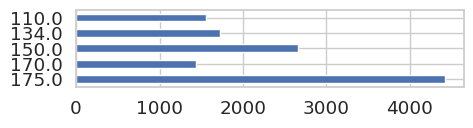

========== RETIREES - Premium ==========
grams  Count
175.0    3232
170.0     959
150.0    1883
134.0    1331
110.0    1193
Name: Product_Weight, dtype: int64


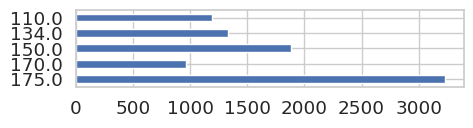

========== RETIREES - Budget ==========
grams  Count
175.0    3768
170.0    1169
150.0    2242
134.0    1517
110.0    1318
Name: Product_Weight, dtype: int64


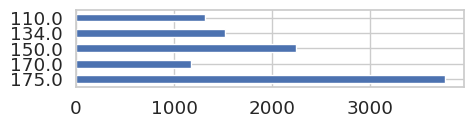

========== RETIREES - Mainstream ==========
grams  Count
175.0    5187
170.0    1636
150.0    3183
134.0    2103
110.0    1829
Name: Product_Weight, dtype: int64


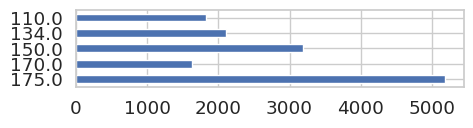

========== YOUNG FAMILIES - Premium ==========
grams  Count
175.0    2926
170.0     850
150.0    1697
134.0    1007
110.0     947
Name: Product_Weight, dtype: int64


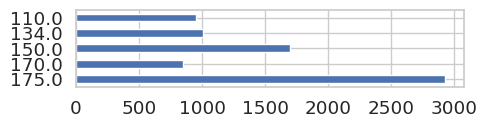

========== YOUNG FAMILIES - Budget ==========
grams  Count
175.0    4800
170.0    1484
150.0    2749
134.0    1674
110.0    1488
Name: Product_Weight, dtype: int64


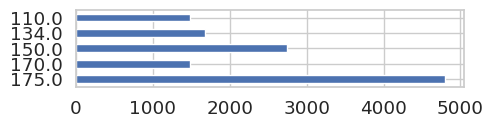

========== YOUNG FAMILIES - Mainstream ==========
grams  Count
175.0    3087
170.0    1016
150.0    1927
134.0    1148
110.0    1010
Name: Product_Weight, dtype: int64


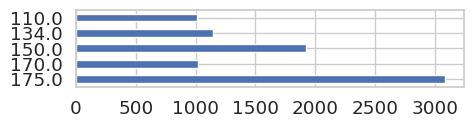

In [75]:
for stage in data_merge["LIFESTAGE"].unique():
    for prem in data_merge["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = data_merge[(data_merge["LIFESTAGE"] == stage) & (data_merge["PREMIUM_CUSTOMER"] == prem)]["Product_Weight"].value_counts().head().sort_index(ascending=False)
        print('grams  Count')
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

In [76]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).sort_values(ascending=False)


LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.255380
                        Budget              9.076773
                        Premium             9.071717
YOUNG FAMILIES          Budget              8.722995
                        Premium             8.716013
                        Mainstream          8.638361
OLDER SINGLES/COUPLES   Budget              6.781398
                        Premium             6.769543
                        Mainstream          6.712021
MIDAGE SINGLES/COUPLES  Mainstream          6.432080
RETIREES                Budget              6.141847
                        Premium             6.103358
MIDAGE SINGLES/COUPLES  Premium             6.078514
                        Budget              6.026459
RETIREES                Mainstream          5.925920
NEW FAMILIES            Mainstream          4.891566
                        Budget              4.821527
                        Premium             4.815652
YOUNG

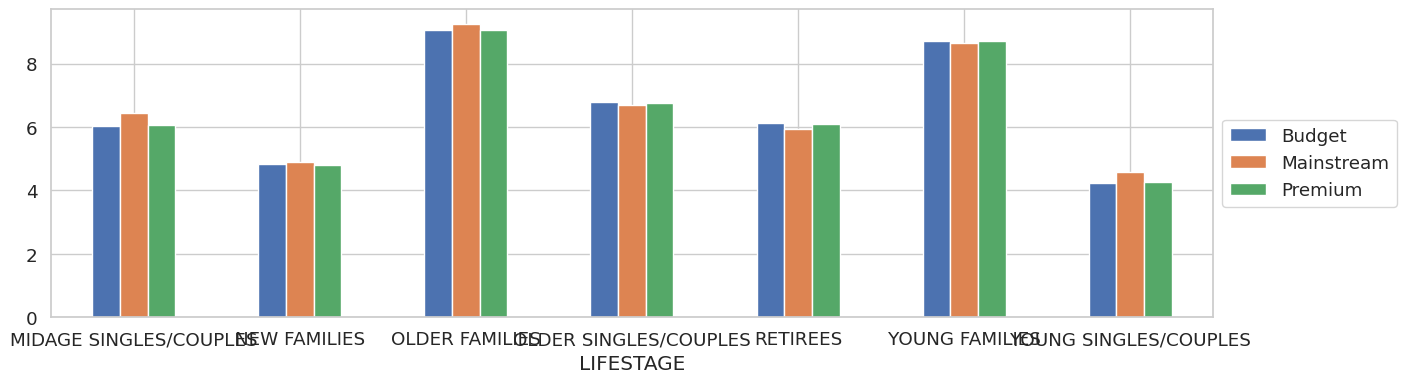

In [77]:

(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("Average purchase quantity per segment.png")

In [78]:


#Average chips price per transaction by segments
temp["Unit_Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]
temp.groupby(["Segment"]).mean()["Unit_Price"].sort_values(ascending=False)

<ipython-input-78-d6be2ef3f3cb>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp.groupby(["Segment"]).mean()["Unit_Price"].sort_values(ascending=False)


Segment
YOUNG SINGLES/COUPLES - Mainstream     4.065642
MIDAGE SINGLES/COUPLES - Mainstream    3.994241
RETIREES - Budget                      3.924404
RETIREES - Premium                     3.920942
NEW FAMILIES - Budget                  3.917688
NEW FAMILIES - Mainstream              3.916133
OLDER SINGLES/COUPLES - Premium        3.893182
OLDER SINGLES/COUPLES - Budget         3.882096
NEW FAMILIES - Premium                 3.872110
RETIREES - Mainstream                  3.844294
OLDER SINGLES/COUPLES - Mainstream     3.814665
MIDAGE SINGLES/COUPLES - Premium       3.770698
YOUNG FAMILIES - Premium               3.762150
YOUNG FAMILIES - Budget                3.760737
OLDER FAMILIES - Budget                3.745340
MIDAGE SINGLES/COUPLES - Budget        3.743328
OLDER FAMILIES - Mainstream            3.737077
YOUNG FAMILIES - Mainstream            3.724533
OLDER FAMILIES - Premium               3.717000
YOUNG SINGLES/COUPLES - Premium        3.665414
YOUNG SINGLES/COUPLES - Budget  

<ipython-input-79-3824cf60ab28>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"].unstack().plot.bar(figsize=(15,4), rot=0)


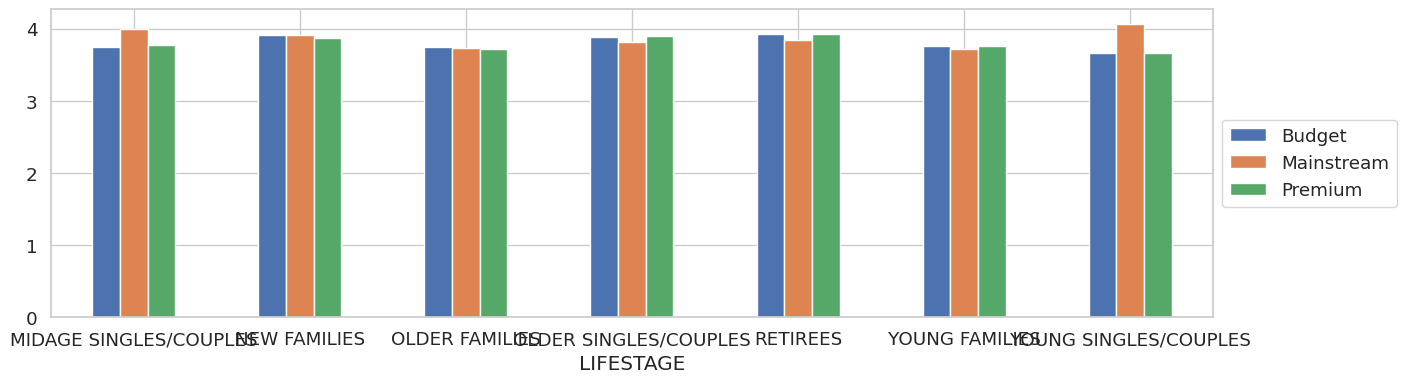

In [79]:


temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"].unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

In [80]:
z = temp.groupby(["Segment", "BRANDS_"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()
z[z["Segment"] == "YOUNG SINGLES/COUPLES - Mainstream"]
     

<ipython-input-80-d4ece2a7f017>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  z = temp.groupby(["Segment", "BRANDS_"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()


,Segment,BRANDS_,TOT_SALES
0,YOUNG SINGLES/COUPLES - Mainstream,Kettle,35423.6
8,YOUNG SINGLES/COUPLES - Mainstream,Doritos,20925.9
22,YOUNG SINGLES/COUPLES - Mainstream,Pringles,16006.2
24,YOUNG SINGLES/COUPLES - Mainstream,Smiths,14958.9
54,YOUNG SINGLES/COUPLES - Mainstream,Infuzions,8749.4
61,YOUNG SINGLES/COUPLES - Mainstream,Twisties,7539.8
69,YOUNG SINGLES/COUPLES - Mainstream,Tostitos,7238.0
70,YOUNG SINGLES/COUPLES - Mainstream,Thins,7217.1
84,YOUNG SINGLES/COUPLES - Mainstream,Cobs,6144.6
115,YOUNG SINGLES/COUPLES - Mainstream,Tyrrells,4800.6


The report highlights the top three segments contributing to the highest total sales. These are Older Families (Budget), Young Singles/Couples (Mainstream), and Retirees (Mainstream), with total sales of $156,864, $147,582, and $145,169, respectively. While the Young Singles/Couples (Mainstream) have the highest population, the Older Families (Budget) have the highest frequency of purchase, which contributes to their high total sales. Moreover, the Older Families and Young Families purchase the highest average quantity of chips per visit.

Among the Mainstream category of "Young and Midage Singles/Couples", spending on chips per purchase is the highest, and Kettle is the most popular brand across all segments. Doritos is the only brand that has a different preference (second most purchased) among this segment. The most frequent chip size purchased is 175gr, followed by the 150gr chip size for all segments.

Recommendations include focusing on the Budget segment for Older Families by providing promotions that encourage more frequent and quantity purchases. For Young Singles/Couples, it is recommended to focus on the Mainstream segment and collaborate with Doritos merchants to promote branding specifically to them. For Retirees, the recommendation is to focus on the Mainstream segment and ensure promotions reach as many of them as possible. Finally, it is recommended to take advantage of the fact that Kettle is the most popular brand and 175gr is the most frequently purchased chip size when promoting chips to all segments.